Linear regression

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos directamente desde el archivo local
data = np.loadtxt('ex1data2.txt', delimiter=',')  # No necesitas subir nada
print(data[0:5, :])

# Separar las columnas en X (características) y y (precio)
X = data[:, 0:2]  # Columnas 0 y 1: tamaño y número de habitaciones
y = data[:, 2:]   # Columna 2: precio

# Imprimir los primeros 10 ejemplos
print('First 10 examples from the dataset:')
for i in range(10):
    print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i, 0].item():.0f}')


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


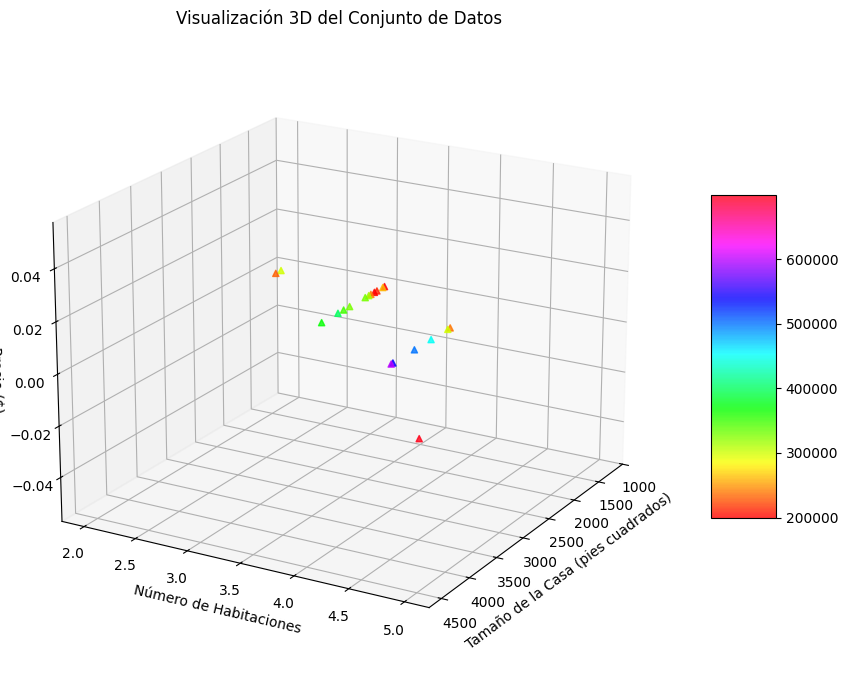

In [47]:
# ==================== Parte 1: Visualización ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos con marcadores en forma de triángulo
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha=0.8,
                    c=y[0:20, 0],
                    cmap=my_cmap,
                    marker='^')

# Etiquetar los ejes
ax.set_xlabel('Tamaño de la Casa (pies cuadrados)')
ax.set_ylabel('Número de Habitaciones')
ax.set_zlabel('Precio ($)')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

# Configurar la vista y los ángulos
ax.view_init(elev=20, azim=30)
ax.grid(True)

# Título y presentación
plt.title('Visualización 3D del Conjunto de Datos')
plt.tight_layout()
plt.show()



# Normalización de características

Tu tarea aquí es completar el código en `featureNormalize.m` para:

* Restar el valor medio de cada característica del conjunto de datos.
* Después de restar el valor medio, adicionalmente escala (divide) los valores de las características
por sus respectivas desviaciones estándar.

Los valores de la media (`mu`) y la desviación estándar (`std`) son:

```plaintext
mu = [2000.68085106, 3.17021277]
std = [794.702354, 0.760981887]


In [48]:
# Extraer las dos primeras columnas del conjunto de datos
X = data[:, 0:2]

# Función para normalizar las características
def featureNormalize(X):
    # Calcular la media (mu) de cada columna
    mu = np.mean(X, axis=0)
    
    # Calcular la desviación estándar (sigma) de cada columna
    sigma = np.std(X, axis=0)
    
    # Normalizar: restar la media y dividir entre la desviación estándar
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

# Aplicar la normalización a X
X, mu, sigma = featureNormalize(X)

# Mostrar la media y desviación estándar utilizadas
print(f'mu = {mu}, std = {sigma}')

# Imprimir los primeros 10 ejemplos ya normalizados
print('Primeros 10 ejemplos del conjunto de datos normalizado:')
for i in range(10):
    print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')

# Mostrar la forma (dimensiones) del conjunto normalizado
print('Dimensiones de X normalizado:', X.shape)


mu = [2000.68085106    3.17021277], std = [7.86202619e+02 7.52842809e-01]
Primeros 10 ejemplos del conjunto de datos normalizado:
x = [0.1314 -0.2261]
x = [-0.5096 -0.2261]
x = [0.5079 -0.2261]
x = [-0.7437 -1.5544]
x = [1.2711 1.1022]
x = [-0.0199 1.1022]
x = [-0.5936 -0.2261]
x = [-0.7297 -0.2261]
x = [-0.7895 -0.2261]
x = [-0.6445 -0.2261]
Dimensiones de X normalizado: (47, 2)


# Función de Costo

El objetivo de la **regresión lineal** es minimizar la siguiente función de costo:

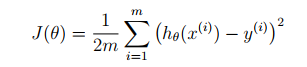

donde la hipótesis h está dada por:

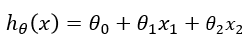



In [49]:
from scipy.optimize import minimize

#Implement cost function
def cost_function(theta, X, y):
    m = len(y)
  
    predictions = X @ theta              # h_theta(x)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J


m = data.shape[0]
X = data[:, 0:2]
[X,mu, sigma] = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])
print(X[0:5,:])
theta = np.zeros((3, 1))
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")




[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
Model parameters: [[0.]
 [0.]
 [0.]]
Cost function: 65591548106.45744


# Descenso de gradiente

A continuación, implementará el descenso de gradiente en el archivo gradientDescent.m.
La estructura del bucle ya está escrita y solo necesita proporcionar las actualizaciones de θ en cada iteración.

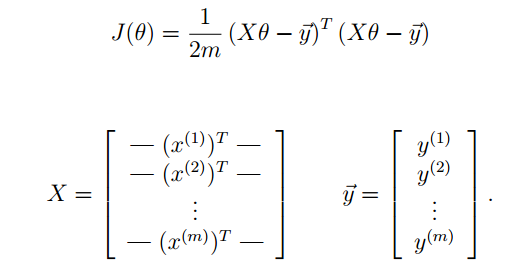

Utilizando los siguientes valores:
iteraciones = 3
theta = np.zeros((2, 1))
alfa = 0.01

Las tres primeras iteraciones:
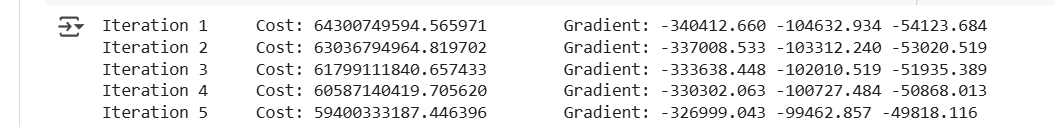

In [50]:
# ==================== Parte: Descenso por gradiente ====================
import numpy as np
import matplotlib.pyplot as plt

iterations = 300  # Número de iteraciones
theta = np.zeros((3, 1))  # Inicialización de los parámetros
alpha = 0.01  # Tasa de aprendizaje

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)  # Número de ejemplos de entrenamiento
    J = np.zeros(iterations)  # Inicialización del historial de costos

    for iter in range(iterations):
        # Instrucciones: Realizar un solo paso del gradiente sobre el vector de parámetros theta.
        # Guardar el costo J en cada iteración

        predictions = X @ theta  # Predicciones usando theta
        error = predictions - y  # Error entre predicciones y valores reales
        gradient = (1 / m) * (X.T @ error)  # Gradiente de la función de costo
        step = alpha * gradient  # Paso de actualización de theta
        theta = theta - step  # Actualización de los parámetros

        # Calcular el costo después de la actualización
        cost = cost_function(theta, X, y)
        J[iter] = cost  # Guardar el costo de la iteración

        # Imprimir la iteración, el costo y el gradiente negativo (valor restado a theta)
        gradient = gradient.flatten()  # Negativo del gradiente
        gradient_str = '  '.join(f"{val:.6f}" for val in gradient)
        print(f"Iteración {iter + 1}  Costo de la función: {cost:.6f}  Gradiente {gradient_str}")

    return theta, J  # Retornar los parámetros optimizados y el historial de costos

# Ejecutar descenso por gradiente
theta, J = gradient_descent(X, y, theta, alpha, iterations)
print("Theta encontrado por descenso por gradiente: ", theta.ravel())

# ==================== Parte: Predicción ====================
# Características nuevas (tamaño y número de habitaciones)
input_features = np.array([2000, 3])

# Normalizar usando mu y sigma previamente calculados
normalized_features = (input_features - mu) / sigma
print("Características normalizadas de entrada:", normalized_features)

# Agregar el término de sesgo (1) como el primer elemento
predict1 = np.hstack([1, normalized_features]) @ theta

# Mostrar predicción (recuerda que los datos están en miles de dólares)
print(f'Para una casa de {input_features[0]} pies² y {input_features[1]} habitaciones,')
print(f'la predicción de precio es: ${predict1.item() * 10000:.2f}')


Iteración 1  Costo de la función: 64297776251.620102  Gradiente -340412.659574  -105764.133493  -54708.821756
Iteración 2  Costo de la función: 63031018305.521317  Gradiente -337008.532979  -104400.140698  -53569.489077
Iteración 3  Costo de la función: 61790694237.532494  Gradiente -333638.447649  -103056.167721  -52449.187637
Iteración 4  Costo de la función: 60576236901.991035  Gradiente -330302.063172  -101731.907794  -51347.615019
Iteración 5  Costo de la función: 59387091739.988602  Gradiente -326999.042541  -100427.058912  -50264.473549
Iteración 6  Costo de la función: 58222716488.389389  Gradiente -323729.052115  -99141.323755  -49199.470219
Iteración 7  Costo de la función: 57082580895.895401  Gradiente -320491.761594  -97874.409620  -48152.316618
Iteración 8  Costo de la función: 55966166445.978844  Gradiente -317286.843978  -96626.028342  -47122.728857
Iteración 9  Costo de la función: 54872966086.507782  Gradiente -314113.975538  -95395.896232  -46110.427499
Iteración 10  